In [1]:
from pandas import Series, DataFrame
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Question 1: Read in data

Read in the data from "gold.txt" and "labels.txt".  
Since there are no headers in the files, `names` parameter should be set explicitly.
> Duplicate records in both dataframes are kept, for repeated test on the same url provides enables more precise information about the turks' discernibility

In [2]:
gold = pd.read_table("gold.txt", names=["url", "category"]).dropna()
# .drop_duplicates()
labels = pd.read_table("labels.txt", names=["turk", "url", "category"]).dropna()
# .drop_duplicates()

## Question 2: Split into two DataFrames

To determine if a `url` in _labels_ is in _gold_, make a list of unique `url` in gold, and `map` the lambda expression on the `url` series in _labels_.

In [3]:
url_list = gold["url"].unique()
labels_on_gold = labels[labels["url"].map(lambda s: s in url_list)]
labels_unknown = labels[labels["url"].map(lambda s: s not in url_list)]

## Question 3: Compute accuracies of turks

1. Since the computation is all on "gold" set `url`, "labels_on_gold" dataframe is used instead of "labels"
2. Merge "labels_on_gold" with "gold" on `url`.
3. Create a new column `correct` in the new dataframe, and assign `True` where the "turk" rating is the same with the true rating.
4. _Optional: drop the rating columns to reduce the size of the dataframe_
5. `groupby` on `turk`, and sum up the `True` records on `correct` for each `turk`, the returned value is a series
6. `value_counts` on `turk`, a series of total rating numbers is returned.
7. Divide the previous two series to get the rating accuracy of each `turk`
8. Create a new dataframe "rater_goodness" with the total rating number series and rating accuracy series, index by default set as `turk`

In [16]:
rater_merged = pd.merge(
                    labels_on_gold,
                    gold,
                    left_on="url",
                    right_on="url",
                    suffixes=["_1", "_2"]
                )

rater_merged["correct"] = rater_merged["category_1"] == rater_merged["category_2"]
rater_merged = rater_merged[["turk", "correct"]]
correct_counts = rater_merged.groupby("turk")["correct"].sum()
total_counts = rater_merged["turk"].value_counts()
avg_correctness = correct_counts/total_counts
rater_goodness = pd.DataFrame({"number_of_ratings": total_counts, "average_correctness": avg_correctness})
rater_goodness[:10]

,average_correctness,number_of_ratings
A112DVP1KG4QZU,1.000000,1
A1253FXHCZ9CWM,0.517241,29
A12CY1Q7XKJJDE,1.000000,1
A12RE8G66WTO8B,0.750000,20
A12Y1GTGIQDGRA,0.333333,3
A13CEW9JGDWGX1,1.000000,1
A13OE9GBRJ0S2U,0.750000,4
A14IQ4GLNWNPOJ,1.000000,1
A153PKAL7OAY36,0.722973,148
A1554ZM0CLKSG5,1.000000,1


## Question 4: Odds ratios

1. Use "map" function on `average_correctness` to get $\frac{average\ correctness}{1 - average\ correctness}$
2. By definition, when `average_correctness` = 1, the ratio should be assigned `float("inf")`

In [13]:
rater_goodness["odds"] = rater_goodness["average_correctness"].map(lambda x: x/(1-x) if x < 1 else float("inf"))
rater_goodness[:20]

,average_correctness,number_of_ratings,odds,turk
A112DVP1KG4QZU,1.000000,1,inf,A112DVP1KG4QZU
A1253FXHCZ9CWM,0.517241,29,1.071429,A1253FXHCZ9CWM
A12CY1Q7XKJJDE,1.000000,1,inf,A12CY1Q7XKJJDE
A12RE8G66WTO8B,0.750000,20,3.000000,A12RE8G66WTO8B
A12Y1GTGIQDGRA,0.333333,3,0.500000,A12Y1GTGIQDGRA
A13CEW9JGDWGX1,1.000000,1,inf,A13CEW9JGDWGX1
A13OE9GBRJ0S2U,0.750000,4,3.000000,A13OE9GBRJ0S2U
A14IQ4GLNWNPOJ,1.000000,1,inf,A14IQ4GLNWNPOJ
A153PKAL7OAY36,0.722973,148,2.609756,A153PKAL7OAY36
A1554ZM0CLKSG5,1.000000,1,inf,A1554ZM0CLKSG5


## Question 5: Most accurate turks

1. Use `rater_goodness["number of ratings"]>=20` to select turks who rated at least 20 times.
2. Sort the list by `average_correctness` in descending order.
3. `.index.values` is optional to return only turks, but for aesthetic reasons it is not applied.

In [6]:
rater_goodness[rater_goodness["number_of_ratings"]>=20].sort_values(by="average_correctness", ascending=False)[:10]

,average_correctness,number_of_ratings,odds
A2U0R4X38GUKZE,0.950000,20,19.000000
A22C0PJUBFJTI0,0.916667,36,11.000000
A23YQUBXZPKILZ,0.875000,24,7.000000
ATVALOQVDCMZW,0.854369,103,5.866667
A1HIXWH4OXT8S4,0.825000,40,4.714286
A3220HG1O83HQ4,0.818182,22,4.500000
A32W20KGQXS0LL,0.800000,25,4.000000
A20PWAB7G3HDHU,0.800000,20,4.000000
AJSJVK40F5HM6,0.785714,28,3.666667
A31OCN4MNHUQ6W,0.777174,184,3.487805


## Question 6: Rating counts versus accuracy

Plotting `average_correctness` against `number of ratings` makes it easier to have an general idea between the two variables. However, from the plot, it is difficult to identify a clear pattern.

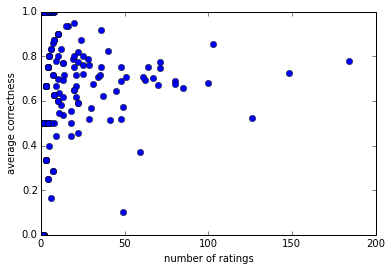

In [7]:
plot(rater_goodness['number_of_ratings'],
     rater_goodness['average_correctness'],
     marker='o',
     color='blue',
     linestyle='None')
xlabel('number of ratings')
ylabel('average correctness')

To quantitatively measure the linear correlation between number of ratings and average correctness, linear regression is used to draw insights.  
From the model summary, it is still difficult to establish reliable linear correlation between the two variables, since the coefficient of number of ratings is not significantly different from zero.
> _statsmodels_ and _patsy_ modules are imported for linear regression

In [8]:
import statsmodels.api as sm
from patsy import dmatrices

y, X = dmatrices('average_correctness ~ number_of_ratings', data=rater_goodness, return_type='dataframe')
model = sm.OLS(y, X)
result = model.fit()
print result.summary()

                             OLS Regression Results                            
Dep. Variable:     average_correctness   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.5488
Date:                 Sat, 30 Jul 2016   Prob (F-statistic):              0.459
Time:                         13:33:32   Log-Likelihood:                -94.663
No. Observations:                  269   AIC:                             193.3
Df Residuals:                      267   BIC:                             200.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.6431

## Question 7: Overall predicted odds

1. Define the cutpoint of top 25% turks in term of number of ratings using `quantile(q=.75)`.
2. Make a list of "turk: number of ratings"
3. Make a mask to select records rated by top 25% turks using `map` function.
4. Select from the total "labels" data set the records rated by top 25% turks.
5. Merge this dataframe with "labels_unknown" dataframe on `url` and `category`, duplicates dropped.
6. Next merge the resulting dataframe with "rater_goodness" dataframe.
    + First create a new `turk` column in "rater_goodness" dataframe from the index
    + Only select the records rated by top 25% turks from "rater_goodness" dataframe
    + Merge the two dataframe on `turk`
    + Drop duplicates and missing values
7. `groupby` the resulting dataframe on `url` and `category`.
8. Apply `prod()` on `odds` to calculate overall odds by `url` and `category`.
> here `odds` is the "overall odds" as defined in the assignment description

In [9]:
top_25_cutpoint = labels_on_gold["turk"].value_counts().quantile(q=.75)
turk_list = labels_on_gold["turk"].value_counts()

mask_1 = labels_unknown["turk"].map(lambda s: turk_list[s]>=top_25_cutpoint if s in turk_list else False)
labels_bytop25 = labels_unknown[mask_1]

rater_goodness["turk"] = rater_goodness.index

odds_top25 = rater_goodness[rater_goodness["turk"].map(lambda s: turk_list[s]>=top_25_cutpoint if s in turk_list else False)]

overall_odds = pd.merge(labels_bytop25,
                       odds_top25,
                       left_on="turk",
                       right_on="turk",
                       how="left").dropna()

overall_odds.groupby(["url", "category"])[["odds"]].prod()[:10]
# overall_odds[:10]

odds
url                                                category           
http://0-101.net                                   G          2.166667
http://000.cc                                      G          1.470000
http://0000.jp                                     G         14.700000
http://000relationships.com                        G         10.084200
                                                   P          1.857143
http://000vitamins.com                             G          3.814493
http://000webhost.com                              G         11.293844
http://003my.com                                   G          4.952381
http://007absolutehardcore.com/early_cumshots/i... P          3.367347
                                                   R         12.413793

## Question 8: Predicted categories

1. Create a dataframe from the `groupby` object in the last question, containing `url`, `category` and `overall odds`.
2. Apply `unstack` to breakdown `category` from index to columns.
3. Transpose the dataframe and get `idxmax()` on all columns, i.e. `url`, returned value is a series with `url` as index and _np.array_ ("odds", `category`) as values.
4. Create a dataframe using the returned series, and convert the _np.array_ into a string column "top category" by selecting the second element.
5. Create a new "top odds" column for the dataframe by `max()` on the transposed dataframe in _step 2_.

In [10]:
overall_odds_df = overall_odds.groupby(["url", "category"])[["odds"]].prod().unstack("category").T.fillna(0)
url_rating = pd.DataFrame(overall_odds_df.idxmax())
url_rating["top category"] = url_rating[0].map(lambda s: s[1])
url_rating = url_rating.set_index(url_rating.index.values)
url_rating["top odds"] = overall_odds_df.max()
url_rating = url_rating[["top category", "top odds"]]
url_rating[:10]

,top category,top odds
http://0-101.net,G,2.166667
http://000.cc,G,1.470000
http://0000.jp,G,14.700000
http://000relationships.com,G,10.084200
http://000vitamins.com,G,3.814493
http://000webhost.com,G,11.293844
http://003my.com,G,4.952381
http://007absolutehardcore.com/early_cumshots/index.html,X,300.376562
http://007swz.cn,G,1.400000
http://01768.com,G,1.400000


## Question 9: Predicted categories using more turks

1. Repeat _Question\ 7_ and _Question\ 8_ to create a dataframe where `url` are rated by top 75% turks.
    > Here only the "top category" column is kept and named `result_75`
2. Take out `top category` column from the dataframe from _Question\ 8_ and rename it `result_25`, and make it a dataframe.
3. Merge the two dataframes on index.
4. Create a `crosstab` with the two columns as index and columns respectively.
5. From the crosstab it can be seen that, the most errors are where the top 25% turks rated "G" but the top 75% turks rated "P" (2930 occurences), "G" versus "R" (483 occurences), "P" versus "G" (197 occurences) and "X" versus "G" (168 occurences).

In [11]:
top_75_cutpoint = labels_on_gold["turk"].value_counts().quantile(q=.25)

mask_2 = labels_unknown["turk"].map(lambda s: turk_list[s]>=top_75_cutpoint if s in turk_list else False)
labels_bytop75 = labels_unknown[mask_2]

odds_top75 = rater_goodness[rater_goodness["turk"].map(lambda s: turk_list[s]>=top_75_cutpoint if s in turk_list else False)]

overall_odds_75 = pd.merge(labels_bytop75,
                       odds_top75,
                       left_on="turk",
                       right_on="turk",
                       how="left").dropna()

overall_odds_df_75 = overall_odds_75.groupby(["url", "category"])[["odds"]].prod().unstack("category").T.fillna(0)

url_rating_75 = pd.DataFrame(overall_odds_df_75.idxmax())
url_rating_75["result_75"] = url_rating_75[0].map(lambda s: s[1])
url_rating_75 = pd.DataFrame(url_rating_75["result_75"])
url_rating_75 = url_rating_75.set_index(url_rating_75.index.values)

url_rating_25 = pd.DataFrame({"result_25": url_rating["top category"]})

url_rating_merged = pd.merge(url_rating_25,
                            url_rating_75,
                            left_index=True,
                            right_index=True,
                            ).dropna()

url_rating_crosstab = pd.crosstab(index=url_rating_merged["result_25"],
                                 columns=url_rating_merged["result_75"]
                                 )

url_rating_crosstab

# overall_odds_75.groupby(["url", "category"])[["odds"]].prod()

result_75,G,P,R,X
result_25,,,,
G,5779,2930,483,79
P,197,314,61,8
R,52,21,132,8
X,168,21,60,297
